<a href="https://colab.research.google.com/github/muhiqbalalamin/DeepLearning-UAS/blob/main/Chapter_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Persiapan Data

In [1]:
import sys
import sklearn
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import tarfile
import urllib.request
import pandas as pd


In [2]:
# Validasi versi Python dan Scikit-Learn
assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

# Konfigurasi tampilan grafik
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Setup path penyimpanan gambar
IMAGES_PATH = os.path.join(".", "images", "end_to_end_project")
os.makedirs(IMAGES_PATH, exist_ok=True)

# Fungsi untuk menyimpan gambar
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, f"{fig_id}.{fig_extension}")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Unduh dan ekstrak dataset
URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
PATH = os.path.join("datasets", "housing")

def fetch_data(url=URL, path=PATH):
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "housing.tgz")
    urllib.request.urlretrieve(url, tgz_path)
    with tarfile.open(tgz_path) as tgz:
        tgz.extractall(path=path)

def load_data(path=PATH):
    return pd.read_csv(os.path.join(path, "housing.csv"))

fetch_data()
housing = load_data()

## Visualisasi Data

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

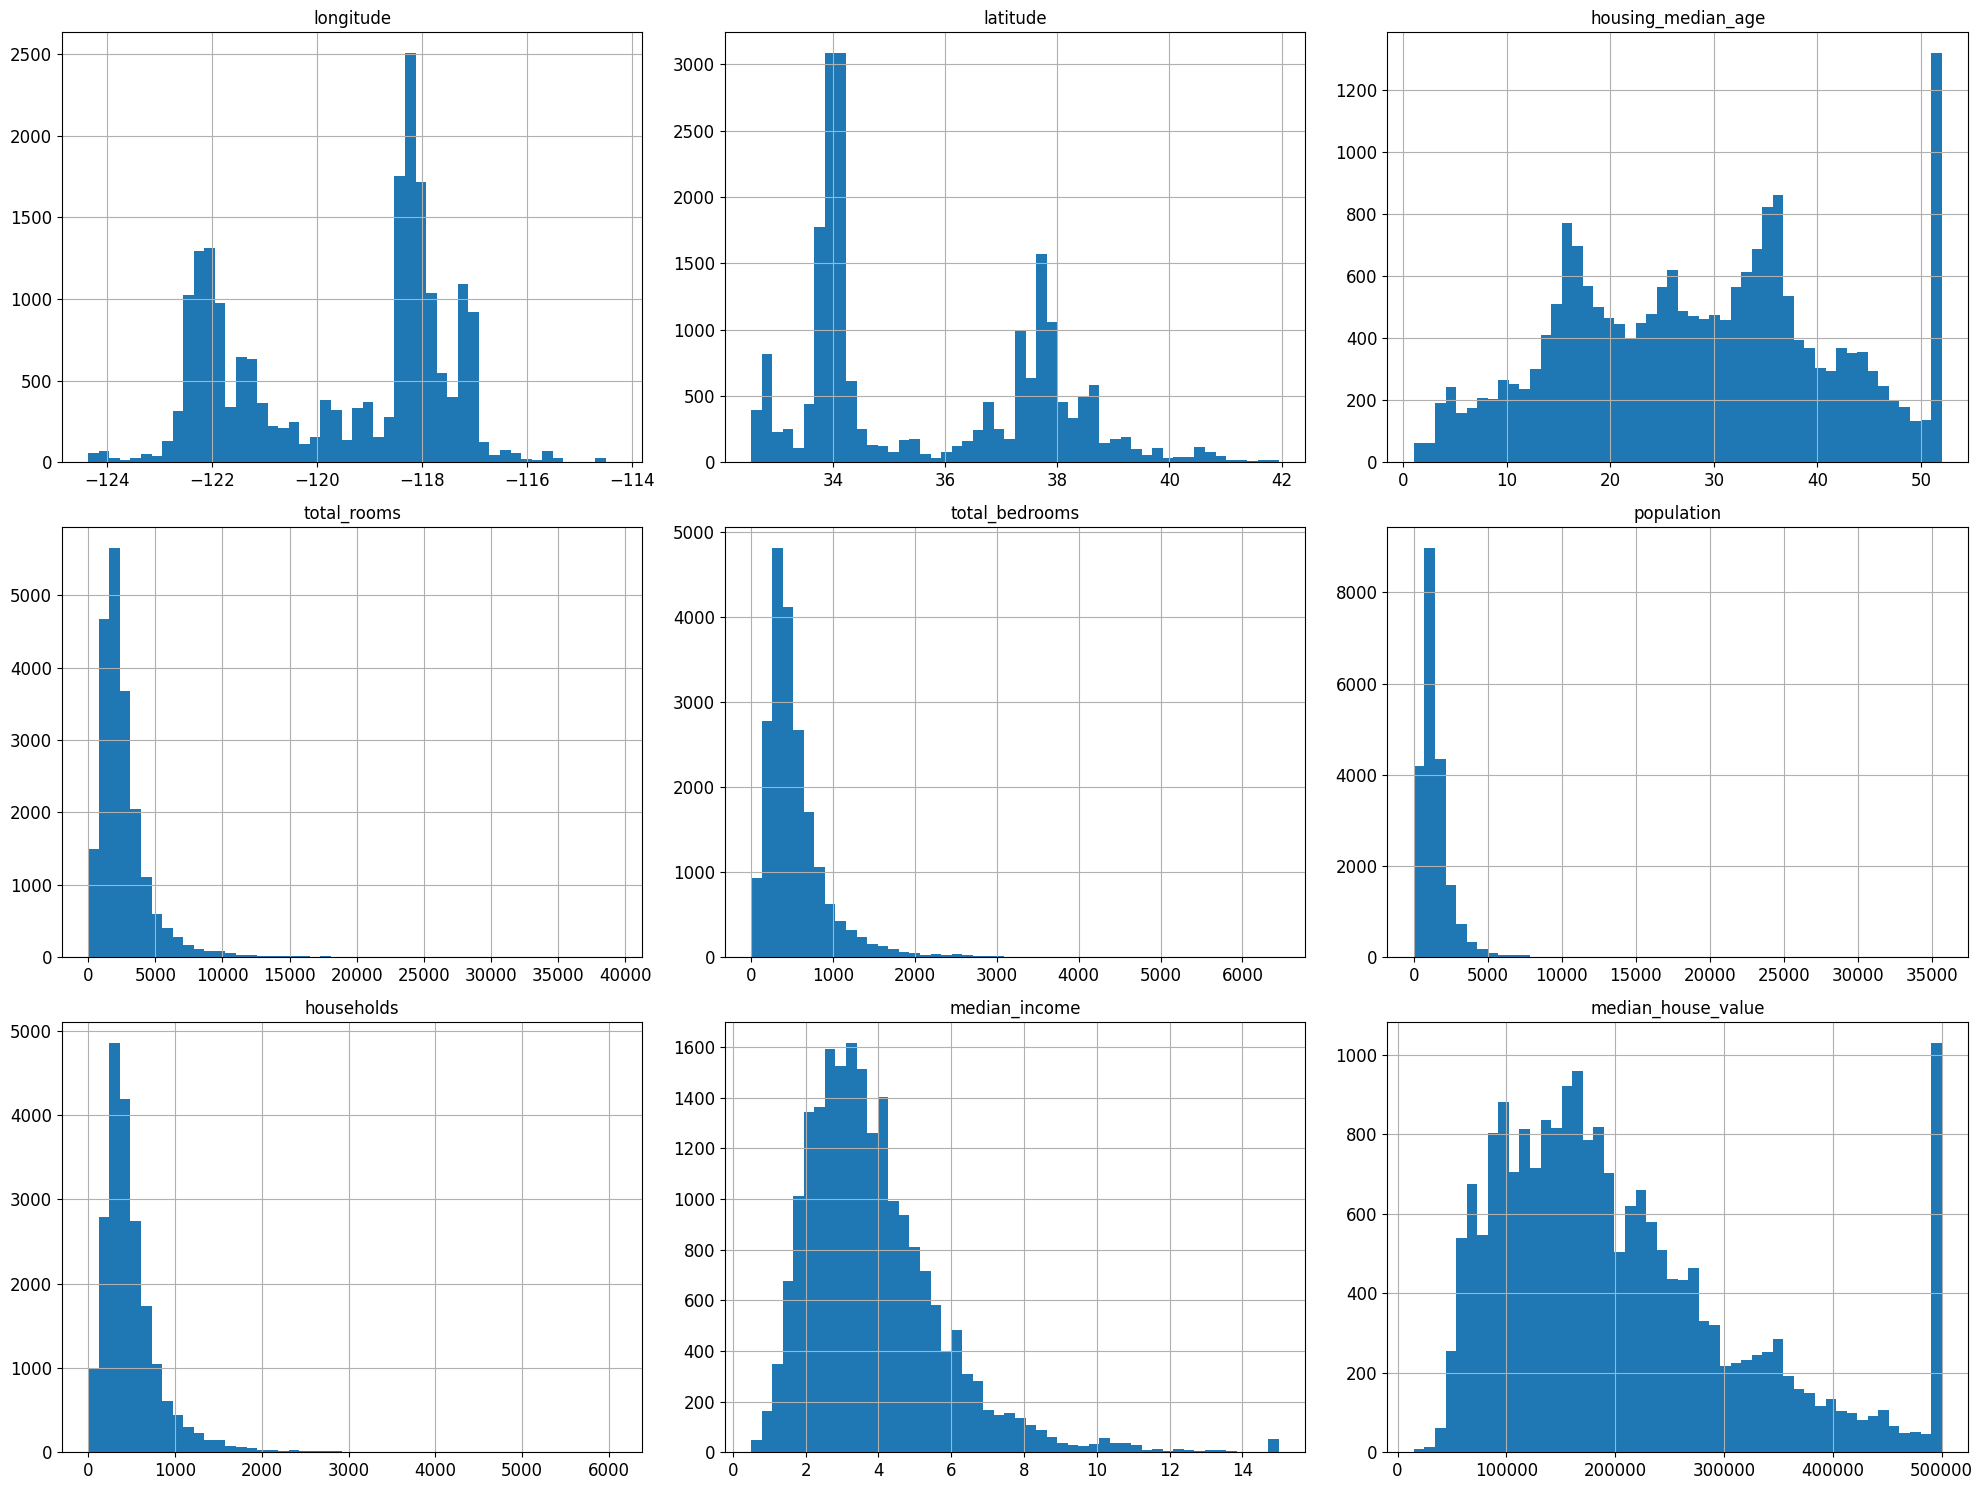

In [3]:
# Eksplorasi data
print(housing.head())
housing.info()
print(housing["ocean_proximity"].value_counts())
print(housing.describe())

# Visualisasi histogram
%matplotlib inline
housing.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histogram_plots")
plt.show()

Saving figure bad_visualization_plot
Saving figure better_visualization_plot
Saving figure housing_prices_scatterplot
Saving figure california_housing_prices_plot


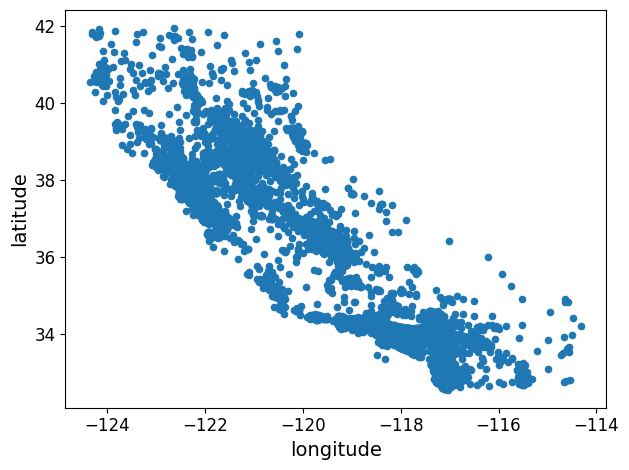

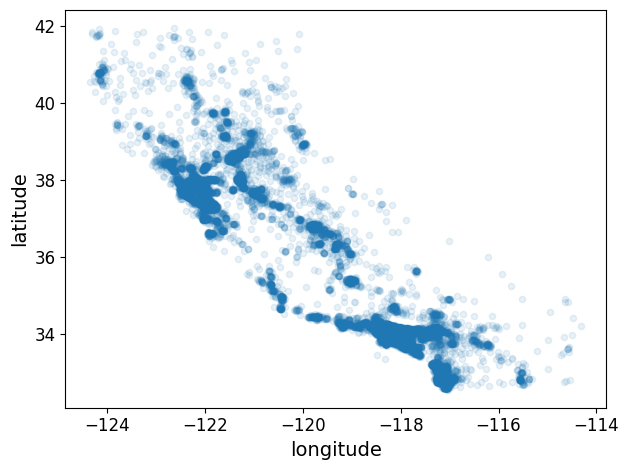

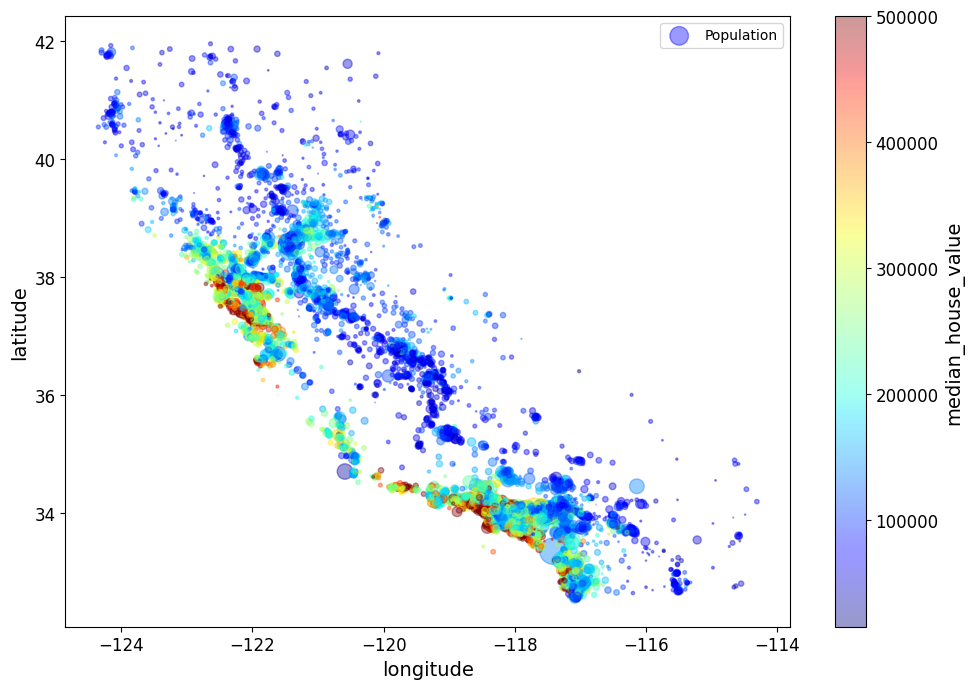

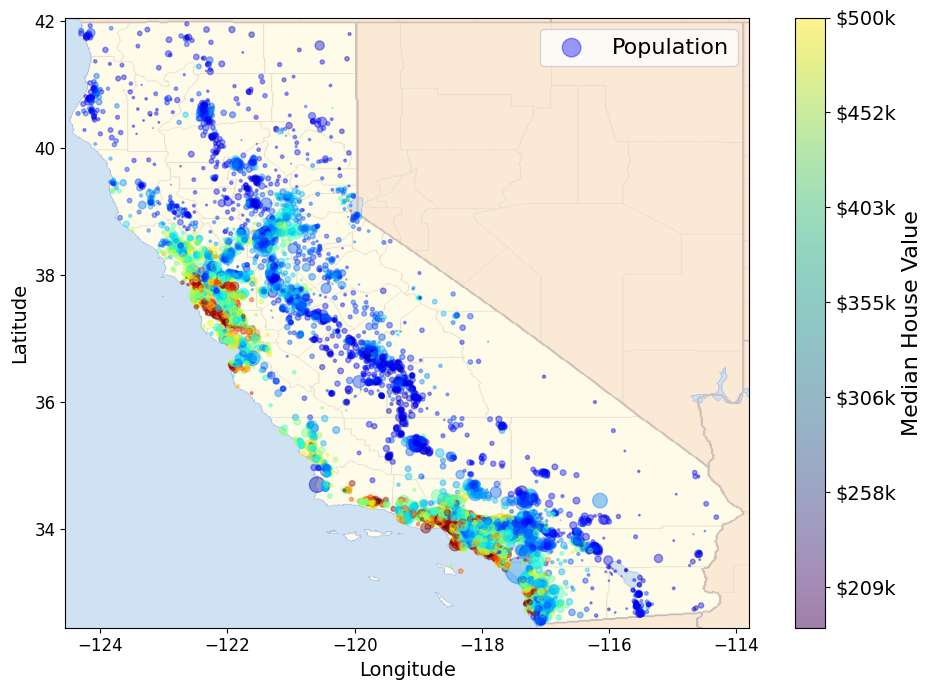

In [4]:
# Asumsikan sebelumnya sudah ada:
# - housing = load_data()
# - fetch_data()
# - save_fig()
# Kita lanjut dari stratifikasi split (harus sudah dibuat sebelumnya)

from sklearn.model_selection import StratifiedShuffleSplit

# Stratifikasi berdasarkan kategori income
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

# Drop kolom income_cat setelah split
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Salin untuk eksplorasi
housing = strat_train_set.copy()

# 1. Visualisasi Dasar Lokasi
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

# 2. Visualisasi dengan alpha (transparansi)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

# 3. Scatter plot dengan populasi & median_house_value
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="Population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

# 4. Unduh gambar peta California (jika belum)
filename = "california.png"
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
img_path = os.path.join(IMAGES_PATH, filename)

if not os.path.exists(img_path):
    print("Downloading", filename)
    urllib.request.urlretrieve(url, img_path)

# 5. Gabungkan plot dengan gambar peta
import matplotlib.image as mpimg
california_img = mpimg.imread(img_path)

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values / prices.max())
cbar.ax.set_yticklabels(["$%dk" % (round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64
Saving figure scatter_matrix_plot
Saving figure income_vs_house_value_scatterplot


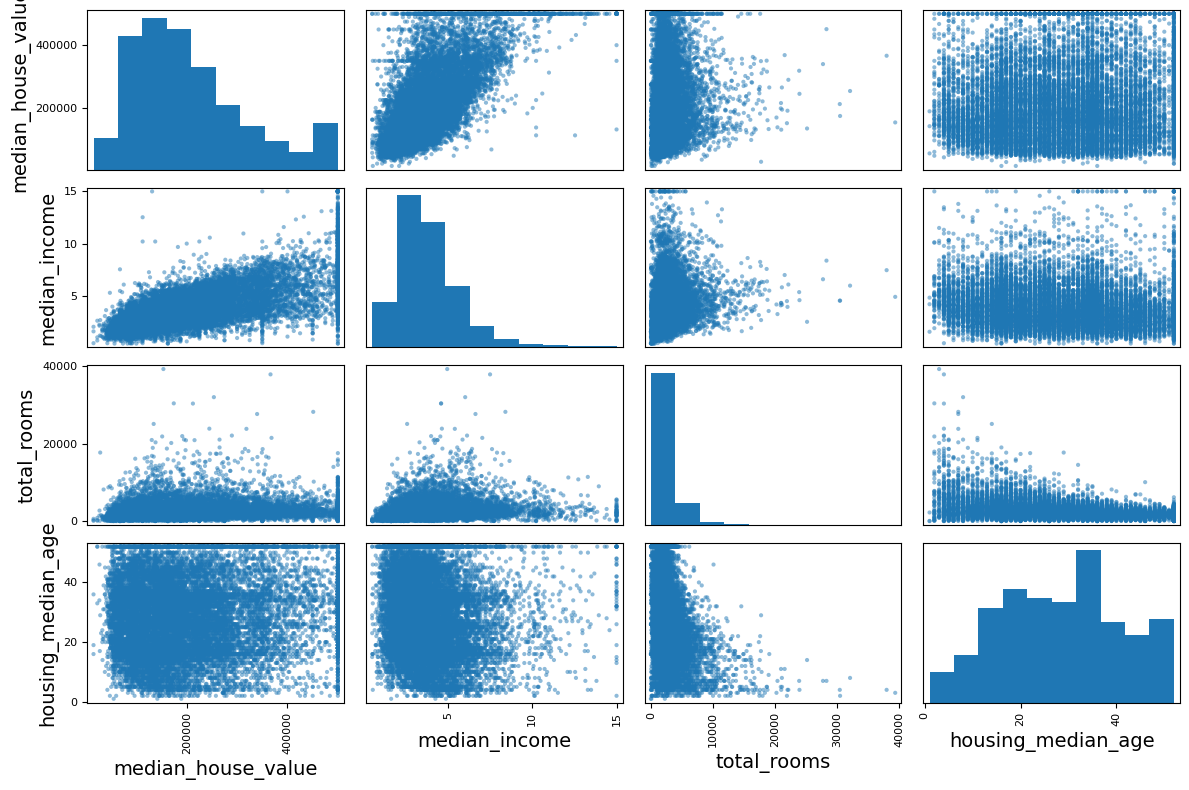

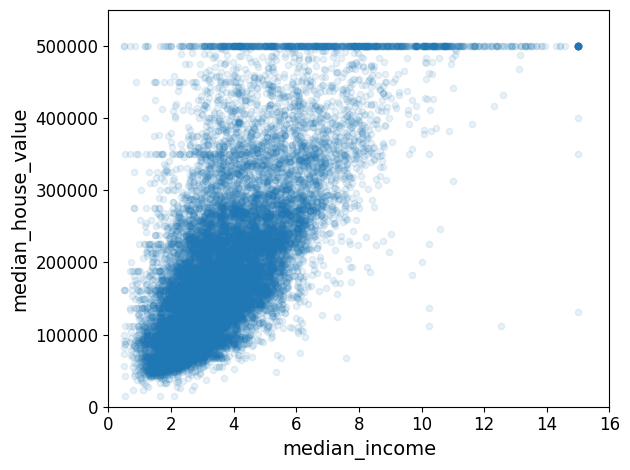

In [5]:
# 1. Matriks korelasi
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

# 2. Scatter matrix untuk beberapa fitur utama
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

# 3. Scatter plot income vs house value
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64
Saving figure rooms_per_household_vs_house_value


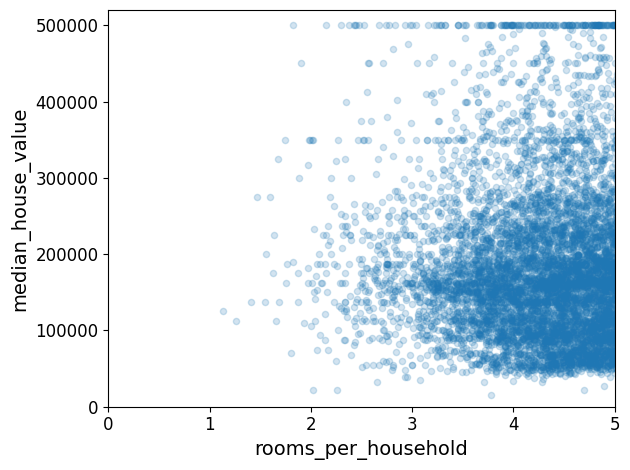

          longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.575635     35.639314           28.653404   2622.539789   
std        2.001828      2.137963           12.574819   2138.417080   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.800000     33.940000           18.000000   1443.000000   
50%     -118.510000     34.260000           29.000000   2119.000000   
75%     -118.010000     37.720000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16354.000000  16512.000000  16512.000000   16512.000000   
mean       534.914639   1419.687379    497.011810       3.875884   
std        412.665649   1115.663036    375.696156       1.904931   
min          2.000000      3.000000      2.000000       0.499900   
25%        295.00000

In [6]:
# 4. Feature Engineering (menambahkan fitur baru)
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

# 5. Korelasi baru setelah feature engineering
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

# 6. Visualisasi rooms_per_household vs house value
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
save_fig("rooms_per_household_vs_house_value")
plt.show()

# 7. Statistik deskriptif akhir
print(housing.describe())

# **Persiapan Data Untuk Algoritma Machine Learning**

## Pembersihan Data

In [7]:
# Pisahkan label dari fitur
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Tangani data hilang: gunakan imputasi median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Ambil hanya fitur numerik untuk imputasi
housing_num = housing.drop("ocean_proximity", axis=1)
# Alternatif: housing.select_dtypes(include=[np.number])

# Latih imputer dan transformasi data
imputer.fit(housing_num)
X = imputer.transform(housing_num)

# Kembalikan hasil ke DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

# Cek hasil imputasi untuk baris yang sebelumnya memiliki nilai NaN
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
print(housing_tr.loc[sample_incomplete_rows.index])

# Tampilkan hasil awal setelah imputasi
print(housing_tr.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0           433.0   
10915    -117.87     33.73                45.0       2264.0           433.0   
19150    -122.70     38.35                14.0       2313.0           433.0   
4186     -118.23     34.13                48.0       1308.0           433.0   
16885    -122.40     37.58                26.0       3281.0           433.0   

       population  households  median_income  
1606        825.0       626.0         2.9330  
10915      1970.0       499.0         3.4193  
19150       954.0       397.0         3.7813  
4186        835.0       294.0         4.2891  
16885      1145.0       480.0         6.3580  
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908  

## Menangani Atribut Teks dan Kategori

In [8]:
# Ambil kolom kategorikal
housing_cat = housing[["ocean_proximity"]]

# --- Ordinal Encoding ---
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

print("Ordinal Encoded (10 contoh):\n", housing_cat_encoded[:10])
print("Kategori Ordinal:", ordinal_encoder.categories_)

# --- One-Hot Encoding ---
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False)  # ubah ke array, bukan sparse matrix
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

print("One-Hot Encoded (10 contoh):\n", housing_cat_1hot[:10])
print("Kategori One-Hot:", cat_encoder.categories_)

Ordinal Encoded (10 contoh):
 [[1.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]]
Kategori Ordinal: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
One-Hot Encoded (10 contoh):
 [[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
Kategori One-Hot: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


## Custom Transformers

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

# Tentukan nama kolom yang akan digunakan
col_names = ["total_rooms", "total_bedrooms", "population", "households"]
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names
]

# Custom transformer untuk menambahkan atribut gabungan
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        return np.c_[X, rooms_per_household, population_per_household]

# Terapkan transformer
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Ubah hasilnya kembali ke DataFrame agar mudah dibaca
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns) + ["rooms_per_household", "population_per_household"],
    index=housing.index
)

# Tampilkan hasil
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


## Transformasi Pipeline

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# --- Pipeline Modern (disarankan) ---

# Pipeline numerik
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('scaler', StandardScaler()),
])

# Atribut
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# Gabungkan pipeline numerik dan kategorikal
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(sparse_output=False), cat_attribs),
])

# Transformasi data
housing_prepared = full_pipeline.fit_transform(housing)
print("Hasil shape:", housing_prepared.shape)

# --- Pipeline Lama (untuk pembanding) ---

# Custom selector untuk pipeline lama
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

# Pipeline numerik dan kategorikal lama
old_num_pipeline = Pipeline([
    ('selector', OldDataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('scaler', StandardScaler()),
])

old_cat_pipeline = Pipeline([
    ('selector', OldDataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse_output=False)),  # Perbaikan di sini
])

from sklearn.pipeline import FeatureUnion
old_full_pipeline = FeatureUnion([
    ("num_pipeline", old_num_pipeline),
    ("cat_pipeline", old_cat_pipeline),
])

# Transformasi dengan pipeline lama
old_housing_prepared = old_full_pipeline.fit_transform(housing)

# Bandingkan hasil kedua pipeline
print("Apakah hasil pipeline baru dan lama sama?", np.allclose(housing_prepared, old_housing_prepared))

Hasil shape: (16512, 16)
Apakah hasil pipeline baru dan lama sama? True


## Memilih dan melatih model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
import joblib

# Fungsi utilitas evaluasi
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# ========== Linear Regression ==========
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# Evaluasi pada 5 data pertama
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("\nLinear Regression Predictions vs. Labels:")
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels     :", list(some_labels))

# Evaluasi RMSE training
lin_predictions = lin_reg.predict(housing_prepared)
lin_rmse = np.sqrt(mean_squared_error(housing_labels, lin_predictions))
print("\nLinear Regression RMSE (train):", lin_rmse)

# Cross-validation
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("\nLinear Regression Cross-Validation:")
display_scores(lin_rmse_scores)

# ========== Decision Tree ==========
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

tree_predictions = tree_reg.predict(housing_prepared)
tree_rmse = np.sqrt(mean_squared_error(housing_labels, tree_predictions))
print("\nDecision Tree RMSE (train):", tree_rmse)  # overfitting (hampir 0)

# Cross-validation
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
print("\nDecision Tree Cross-Validation:")
display_scores(tree_rmse_scores)

# ========== Random Forest ==========
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

forest_predictions = forest_reg.predict(housing_prepared)
forest_rmse = np.sqrt(mean_squared_error(housing_labels, forest_predictions))
print("\nRandom Forest RMSE (train):", forest_rmse)

# Cross-validation
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print("\nRandom Forest Cross-Validation:")
display_scores(forest_rmse_scores)

# ========== Simpan Model ==========
# Simpan model terbaik, misal Random Forest
joblib.dump(forest_reg, "best_model_forest_reg.pkl")
# Untuk memuat ulang:
# loaded_model = joblib.load("best_model_forest_reg.pkl")


Linear Regression Predictions vs. Labels:
Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels     : [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]

Linear Regression RMSE (train): 68627.87390018745

Linear Regression Cross-Validation:
Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180694

Decision Tree RMSE (train): 0.0

Decision Tree Cross-Validation:
Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928

Random Forest RMSE (train): 18650.698705770003

Random Forest Cross-Validation:
Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 

['best_model_forest_reg.pkl']

## Menyempurnakan Model

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Definisi grid hyperparameter yang akan diuji
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

# Inisialisasi model dan GridSearchCV
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Latih model dengan grid search
grid_search.fit(housing_prepared, housing_labels)

# Tampilkan hasil terbaik
print("\n Best Parameters:")
print(grid_search.best_params_)

print("\n Best Estimator:")
print(grid_search.best_estimator_)

# Tampilkan semua kombinasi & skor RMSE
print("\n Grid Search Results (mean RMSE):")
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f"RMSE: {np.sqrt(-mean_score):.2f} - {params}")


 Best Parameters:
{'max_features': 8, 'n_estimators': 30}

 Best Estimator:
RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

 Grid Search Results (mean RMSE):
RMSE: 63895.16 - {'max_features': 2, 'n_estimators': 3}
RMSE: 54916.32 - {'max_features': 2, 'n_estimators': 10}
RMSE: 52885.87 - {'max_features': 2, 'n_estimators': 30}
RMSE: 60075.37 - {'max_features': 4, 'n_estimators': 3}
RMSE: 52495.01 - {'max_features': 4, 'n_estimators': 10}
RMSE: 50187.24 - {'max_features': 4, 'n_estimators': 30}
RMSE: 58064.74 - {'max_features': 6, 'n_estimators': 3}
RMSE: 51519.32 - {'max_features': 6, 'n_estimators': 10}
RMSE: 49969.80 - {'max_features': 6, 'n_estimators': 30}
RMSE: 58895.82 - {'max_features': 8, 'n_estimators': 3}
RMSE: 52459.80 - {'max_features': 8, 'n_estimators': 10}
RMSE: 49898.99 - {'max_features': 8, 'n_estimators': 30}
RMSE: 62381.77 - {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
RMSE: 54476.57 - {'bootstrap': False, 'max_features': 2, 'n_

## Analisis Model Terbaik dan Kesalahannya

In [13]:
# Ambil pentingnya fitur dari model terbaik hasil GridSearchCV
feature_importances = grid_search.best_estimator_.feature_importances_

# Ambil nama-nama fitur:
# 1. Fitur numerik asli
num_attribs = list(housing_num.columns)

# 2. Fitur tambahan dari CombinedAttributesAdder
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]

# 3. Fitur kategorikal (hasil OneHotEncoder)
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])  # kategori dari 'ocean_proximity'

# Gabungkan semua nama atribut secara berurutan sesuai pipeline
all_attributes = num_attribs + extra_attribs + cat_one_hot_attribs

# Tampilkan pentingnya fitur secara terurut
print("\n Feature Importances (top-down):")
for importance, name in sorted(zip(feature_importances, all_attributes), reverse=True):
    print(f"{name:<25}: {importance:.4f}")


 Feature Importances (top-down):
median_income            : 0.3790
INLAND                   : 0.1657
population_per_household : 0.1070
longitude                : 0.0697
latitude                 : 0.0604
rooms_per_household      : 0.0548
bedrooms_per_room        : 0.0482
housing_median_age       : 0.0422
population               : 0.0158
total_bedrooms           : 0.0156
total_rooms              : 0.0152
households               : 0.0149
<1H OCEAN                : 0.0068
NEAR OCEAN               : 0.0030
NEAR BAY                 : 0.0015
ISLAND                   : 0.0001


## Mengevaluasi Sistem

In [14]:
from scipy import stats
from sklearn.metrics import mean_squared_error
import numpy as np

# Ambil model terbaik dari GridSearchCV
final_model = grid_search.best_estimator_

# Pisahkan fitur & label dari test set
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Transformasi test set menggunakan pipeline
X_test_prepared = full_pipeline.transform(X_test)

# Prediksi & evaluasi
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f" Final RMSE on Test Set: {final_rmse:.2f}")

# Hitung interval kepercayaan 95% untuk RMSE
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
sem = stats.sem(squared_errors)
conf_int = stats.t.interval(confidence, df=len(squared_errors) - 1, loc=mean, scale=sem)
conf_int_rmse = np.sqrt(conf_int)

print("\n 95% Confidence Interval for Test RMSE:")
print(f"Lower Bound: {conf_int_rmse[0]:.2f}")
print(f"Upper Bound: {conf_int_rmse[1]:.2f}")

 Final RMSE on Test Set: 47873.26

 95% Confidence Interval for Test RMSE:
Lower Bound: 45893.36
Upper Bound: 49774.47


# **Proses End-to-End Machine Learning - California Housing**

## 1. Persiapan Dataset

Dataset California Housing diunduh dan diekstrak secara otomatis dari GitHub, kemudian dimuat ke dalam objek pandas.DataFrame. Eksplorasi awal dilakukan menggunakan .head(), .info(), dan .describe() untuk memahami struktur dan statistik data.

## 2. Visualisasi Data

Scatter plot digunakan untuk menampilkan distribusi geografis berdasarkan longitude dan latitude.
Warna menunjukkan nilai median_house_value, sementara ukuran titik merepresentasikan jumlah population.
Visualisasi diperkuat dengan menambahkan peta latar California untuk konteks geografis.

## 3. Analisis Korelasi & Feature Engineering

Dilakukan analisis korelasi antara fitur-fitur dengan target median_house_value.
Beberapa fitur baru ditambahkan untuk meningkatkan kualitas prediksi, yaitu:

* rooms_per_household

* population_per_household

* bedrooms_per_room

## 4. Penanganan Nilai Hilang

Fitur total_bedrooms yang memiliki missing value ditangani menggunakan metode imputasi median dengan SimpleImputer.

## 5. Encoding Fitur Kategorikal

Fitur kategorikal ocean_proximity ditransformasikan dengan:

* Ordinal Encoding untuk analisis awal

* One-Hot Encoding untuk pipeline akhir

## 6. Pipeline Preprocessing

Dibuat pipeline preprocessing terpisah untuk fitur numerik dan kategorikal menggunakan Pipeline dan ColumnTransformer.
Pipeline digunakan untuk mentransformasikan data sebelum proses pelatihan.
Pendekatan ini juga dibandingkan dengan metode manual (menggunakan FeatureUnion dan selector), dengan hasil yang identik.

## 7. Pelatihan Model Dasar

Model dasar yang dilatih antara lain:

* LinearRegression

* DecisionTreeRegressor

* RandomForestRegressor

Evaluasi dilakukan menggunakan RMSE pada data pelatihan dan teknik cross-validation dengan cv=10.

## 8. Tuning Hyperparameter

Proses hyperparameter tuning dilakukan pada model Random Forest menggunakan GridSearchCV, mencakup parameter:

* n_estimators

* max_features

* bootstrap

Penilaian performa berdasarkan RMSE, yang dihitung sebagai akar dari nilai negatif MSE.

## 9. Feature Importance

Model terbaik memberikan informasi penting terkait kontribusi fitur.
Fitur dengan pengaruh terbesar antara lain:

* median_income

* INLAND

* bedrooms_per_room

* rooms_per_household

## 10. Evaluasi Akhir pada Test Set

Dataset test diproses menggunakan pipeline yang sama, lalu dihitung nilai RMSE.
Interval kepercayaan 95% untuk RMSE juga dihitung menggunakan distribusi t terhadap galat kuadrat.

# **Kesimpulan Evaluasi**

## Ringkasan Hasil Evaluasi
Model RandomForestRegressor yang telah dituning dengan GridSearchCV menunjukkan performa akhir sebagai berikut:

* RMSE pada test set: 47873,26

Artinya, rata-rata kesalahan dalam memprediksi harga rumah berada di kisaran ±47.873 dolar.

## Interval Kepercayaan 95%
Berdasarkan perhitungan statistik terhadap galat prediksi:

* Batas Bawah: 45893,36

* Batas Atas: 49774,47
Dengan tingkat kepercayaan 95%, dapat disimpulkan bahwa kesalahan prediksi model terhadap data baru kemungkinan besar berada dalam rentang tersebut.

## Implikasi dan Rekomendasi
Model menunjukkan akurasi yang baik dan stabil untuk tugas regresi harga rumah.
Dapat diterapkan untuk estimasi harga properti di wilayah California dengan tingkat ketelitian yang dapat diterima.

Model ini masih berpotensi ditingkatkan lebih lanjut melalui:

* Feature engineering lanjutan

* Tuning hyperparameter yang lebih luas

* Eksplorasi algoritma ensemble lain seperti XGBoost, Gradient Boosting, atau Stacking